# Predictive analysis (Supervised learning) tutorial

## Introduction

Machine learning is the field of study that revolves around computers *studying* data and using it to make predictions on unseen data.

The key difference here is that a machine learning model is not **explicitly programmed** using if conditions to predict values. The model looks at **training data** and does A LOT of math which helps it make predictions on new data that it has never seen before. 

## Getting started - Importing the libraries

To implement predictive analysis, we would need the following libraries imported onto our notebook.

1. **numpy** - Now that we know what numPy is, we will prefer this over standard python lists (atleast for machine learning --> please don't use numPy on your assignments/exams without consulting ma'am!)

2. **pandas** - Used to extract data from the CSV dataset and preprocess it.

3. **matplotlib** - For graphing/visualising data

4. **sklearn** - Main man of the show. This is a widely used machine learning library with extensive functionality. 

In [20]:
# Install the libraries on your machine if they are not there already. 
!pip install numpy pandas matplotlib sklearn
# If you are doing this on a terminal window use python -m pip install numpy pandas matplotlib sklearn

# Import the installed libraries into Jupyter/collab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Now that we have the libraries involved, lets go through the steps to run predictive analysis. 

1. Data preprocessing
2. Model training 
3. Model Evaluation 
4. Making predictions on the model
5. Some behind the scenes content

### Agenda: Predict the Visual apparent magnitude of a star (y) from the distance between the earth and the star (x)

- To do this, I have a dataset from kaggle: https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs/data

- This is a dataset with about 3643 samples - A lot! (In most cases, the more data we have to train, the better the model is)

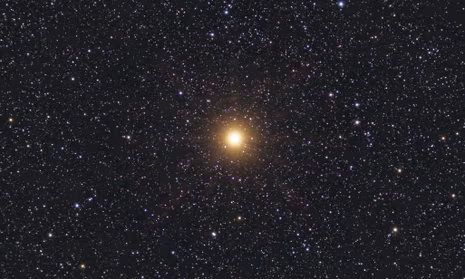

# (a) Data Preprocessing using pandas
First, we have to load the data into our notebook and **SPLIT** it into a **TRAINING** set and a **TESTING SET**. A commonly used split in the industry is 70:30 = Train:Test

In [7]:
filepath = "star_dataset.csv"

dataFrame = pd.read_csv(filepath)
# This loads the CSV file into a 'dataFrame' object. Think of this as a separate data type like int, float, list etc. 

print("This is the metadata of the data frame:\n")
dataFrame.info()
print("\n\nThis is a preview of the data frame:\n")
dataFrame.head()

This is the metadata of the data frame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


This is a preview of the data frame:



,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


### Note that Vmag is our y variable (also called the target variable) and Plx is our x variable (also called the feature variable). It is important to note the column names to load the appropriate numbers into a numPy array.

In [9]:
# Split the data into 70% train and 30% test 
testSetFraction = 0.30
dataFrame_test = dataFrame.sample(frac=0.30, random_state=42) # Randomly sample 30% of the values into the test set. 
dataFrame_train = dataFrame.drop(dataFrame_test.index) # Remove the test values from the original data set.

print("This is the metadata of the training set:\n")
dataFrame_train.info()
print("This is the metadata of the testing set: \n")
dataFrame_test.info()

This is the metadata of the training set:

<class 'pandas.core.frame.DataFrame'>
Index: 2549 entries, 1 to 3638
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         2549 non-null   float64
 1   Plx          2549 non-null   float64
 2   e_Plx        2549 non-null   float64
 3   B-V          2549 non-null   float64
 4   SpType       2549 non-null   object 
 5   Amag         2549 non-null   float64
 6   TargetClass  2549 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.3+ KB
This is the metadata of the testing set: 

<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 415 to 462
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         1093 non-null   float64
 1   Plx          1093 non-null   float64
 2   e_Plx        1093 non-null   float64
 3   B-V          1093 non-null   float64
 4   SpType      

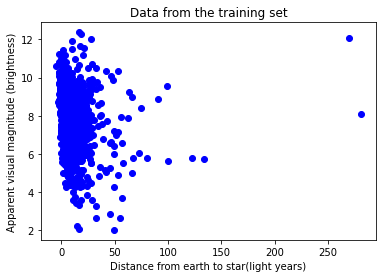

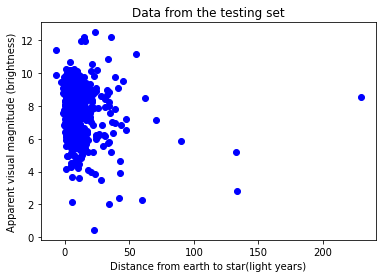

In [25]:
# Now, load the data into numpy arrays with the .to_numpy() function provided by pandas. 
xtrain = dataFrame_train['Plx'].to_numpy()
ytrain = dataFrame_train['Vmag'].to_numpy()
xtest = dataFrame_test['Plx'].to_numpy()
ytest = dataFrame_test['Vmag'].to_numpy()

# Now, visualise the data with a scatter graph

plt.scatter(xtrain, ytrain, color='blue')
plt.xlabel('Distance from earth to star(light years)')
plt.ylabel('Apparent visual magnitude (brightness)')
plt.title('Data from the training set')
plt.show()

plt.scatter(xtest, ytest, color='blue')
plt.xlabel('Distance from earth to star(light years)')
plt.ylabel('Apparent visual magnitude (brightness)')
plt.title('Data from the testing set')
plt.show()

# VERY IMPORTANT - The X ARRAYS HAVE TO BE MADE INTO A 2D ARRAY FOR SKLEARN TO PROCESS THEM, SO USE RESHAPING FROM NUMPY.
xtrain = xtrain.reshape(-1, 1)
xtest = xtest.reshape(-1, 1)

### 😔 That isn't a very clear relationship, but that is expected. Other internal factors of the star and presence of dust clouds in between the earth and the star affect brightness much more than distance, but we can still make some predictions from here. 

Note: When we look at model metrics later, we can see the strength of the relationship from the r squared score. 

# (b) Training the model using sklearn 


In [31]:
# We will use the training set to train the model 
myModel = LinearRegression()
myModel.fit(xtrain, ytrain)

# Once the model is trained, we can access the parameters of the model like below. 
# In our context, coef_ is the slope of the best fit line and intercept_ is the y intercept.

myModel.coef_, myModel.intercept_
# We usually store this in a DICTIONARY which is a set of (indentifier - data) pairs. 
# You can look at it as field-value pairs in a databse. 

myModel_parameters = {'slope': myModel.coef_,
                     'intercept': myModel.intercept_}

print("\nPARAMETER 1: The slope of the best fit line is ", myModel_parameters['slope'][0]) 
print("\nPARAMETER 2: The intercept of the best fit line is ", myModel_parameters['intercept'])




PARAMETER 1: The slope of the best fit line is  -0.0175158951324269

PARAMETER 2: The intercept of the best fit line is  8.264385363508982


# (c) Model Evaluation on the test set
- This is the reason that we split the data in the first place. 
    - We **TRAIN** the model on the training set.
    - We **EVALUATE** the model on the testing set. 
    - It is important to use separate sets of data for both to ensure fairness because the model has already seen the training set and by default will make accurate predictions on the training set, but the test set is unseen and reflects a real world test (recall that the goal of machine learning is to eventually make predictions on unseen data). 
    

In [38]:
# We will compute three numbers which reflect the performance of the model. 
myModel_scores = {}

ypred = myModel.predict(xtest)
# This stores all the scores in the regression 
myModel_scores['COEFFICIENT OF DETERMINATION'] = r2_score(ytest, ypred)
myModel_scores['MEAN ABSOLUTE ERROR'] = mean_absolute_error(ytest, ypred)
myModel_scores['MEAN SQUARED ERROR'] = mean_squared_error(ytest, ypred)

# Disregard this - It just uses a for loop to print the values from the dictionary. You can manually access them aswell. 

for key in myModel_scores.keys(): 
    print("The", key.lower(), " is ", myModel_scores[key])
    

1.8514405538564145
The coefficient of determination  is  0.03461717535149966
The mean absolute error  is  1.0428723268476632
The mean squared error  is  1.8514405538564145


### The model isn't the best. The coefficient of determination (which measures the strength of the relationship between brightness and distance) is quite low, and this is reflected in the graph below.


### It is very important to choose a meaningful set of features to perform predictive analysis on. In our case, brightness vs distance was not a great choice but still not a very bad one either. 

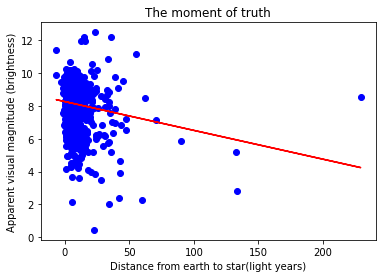

In [39]:
plt.scatter(xtest, ytest, color='blue')
plt.plot(xtest, ypred, color='red')
plt.xlabel('Distance from earth to star(light years)')
plt.ylabel('Apparent visual magnitude (brightness)')
plt.title('The moment of truth')
plt.show()

#### Observe the line of best fit (in red). This is what the model came up with. Just like how you eye the graph in Physics practicals and draw the line of best fit, the model did the same thing using math and on a large set of points. 

Now you might be wondering, what is different about machine learning if it does the same thing as me but just on a grander scale? - Machine learning can do this for multiple features. 

For example, if you wanted to use the distance from the earth 'Plx' and the uncertainty in the distance 'e-plx' AND the color index 'B-V', then you're left in the dark. There isn't even an easy way to plot Apparent magnitude against all of these independent variables together. 

#### Later on, we'll look at the math behind all of this. You'll get what I'm talking about now after looking at the math.


# (d) Making predictions from the data

1. Suppose we have a star which is 69 light years away. What is the predicted apparent visual magnitude? 
2. Suppose we have another star which is 420 light years away. What is the predicted apparent magnitude of this star? 
3. Finally, let us look at a real star. 
- Polaris (the north star) is a star that is 433 light years away. Its measured apparent magnitude is 2.00. What does our model think? 



In [ ]:
star1 = myModel.predict(np.array([[69]]))
star2 = myModel.predict(np.array([[420]]))
polaris_predicted = myModel.predict(np.array([[433]]))

print('Star 1\'s predicted brightness is', star1)
print('Star 2\'s precited brightness is', star2)
print('Polaris\'s predicted brightness is', polaris_predicted)

Welp! Our model severely underestimated Polaris's brightness. 


# (e) The math behind predictive analysis

The model used to make predictions is similar to a **straight line** equation:

$
f_{w,b}(x) = wx + b
$

- w and b (or the slope and intercept) are called the **parameters** of the model.
- X is called the feature varaible. This is the input to the function on which predictions are made. 
- The function outputs the prediction. 

When the model is trained, we find **optimal** values for w and b - these are the errors that result in the least **COST** on the training dataset. The cost is calculated as follows: 


$
   \text{Residual Error}_i = f_{wb}(x_i) - y_i = wx_i + b - y_i
$

${Loss}_i = \frac{1}{2}(f_{wb}(x_i) - y)^2 = \frac{1}{2}({Residual Error}_i)^2$ - The error is squared and halved for the loss.

${Cost} = \frac{1}{n} \sum_{i=1}^{n} \left( {Loss}_i \right)$ - We are calculating the loss **FOR EACH EXAMPLE** and **SUMMING UP ALL THE LOSSES TO FORM THE COST FUNCTION.**

- Note that n is the number of examples. That weird symbol means a sum (for i = 1 to n, so over all training examples) of the loss function.

## Happy coding! 

Here are some links for further exploration: 
1. https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf (first few pages)
2. https://www.w3schools.com/python/python_ml_getting_started.asp

- Hayagreev Jeyandran, AS Level (B)